# **ABOUT THIS DATASET**

Tập dữ liệu này là một bộ sưu tập thông tin về các trận chiến đấu giữa hai Pokémon và kết quả của chúng. Mỗi hàng trong tập dữ liệu đại diện cho một trận chiến giả định giữa Pokémon 1 (P1) và Pokémon 2 (P2), cùng với một lượng lớn các thuộc tính thống kê và mô tả chi tiết cho cả hai Pokémon.

Mục đích chính của tập dữ liệu này là để phân tích hoặc xây dựng mô hình dự đoán Pokémon nào sẽ chiến thắng dựa trên các thuộc tính của chúng.

# **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

# **READ DATASET**

In [2]:
df_raw = pd.read_csv('DATASET.csv')
df = df_raw.copy()
display(df.head(10))

,First_pokemon,Second_pokemon,Winner,Name_P1,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,Name_P2,...,p2_japanese_name,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg
0,266,298,298.0,Larvitar,50,64,50,II,False,Nuzleaf,...,Konohanaコノハナ,Nuzleaf,50.0,274.0,60.0,40.0,60.0,grass,dark,28.0
1,702,701,701.0,Virizion,91,90,72,V,True,Terrakion,...,Terrakionテラキオン,Terrakion,NaN,639.0,72.0,90.0,108.0,rock,fighting,260.0
2,191,668,668.0,Togetic,55,40,85,II,False,Beheeyem,...,Ohbemオーベム,Beheeyem,50.0,606.0,125.0,95.0,40.0,psychic,NaN,34.5
3,237,683,683.0,Slugma,40,40,40,II,False,Druddigon,...,Crimganクリムガン,Druddigon,50.0,621.0,60.0,90.0,48.0,dragon,NaN,139.0
4,151,231,151.0,Omastar,70,60,125,I,False,Shuckle,...,Tsubotsuboツボツボ,Shuckle,50.0,213.0,10.0,230.0,5.0,bug,rock,20.5
5,657,752,657.0,Joltik,50,47,50,V,False,Aegislash Shield Forme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192,134,134.0,Natu,40,50,45,II,False,Jynx,...,Rougelaルージュラ,Jynx,0.0,124.0,115.0,95.0,95.0,ice,psychic,40.6
7,73,545,545.0,Machop,70,80,50,I,False,Giratina Altered Forme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,220,763,763.0,Pineco,50,65,90,II,False,Clauncher,...,Udeppouウデッポウ,Clauncher,50.0,692.0,58.0,63.0,44.0,water,NaN,8.3
9,302,31,31.0,Wingull,40,30,30,III,False,Pikachu,...,Pikachuピカチュウ,Pikachu,50.0,25.0,50.0,50.0,90.0,electric,NaN,6.0


**CONTENT**
* First_pokemon: Pokedex Number (ID) của Pokémon 1.
* Second_pokemon:	Pokedex Number (ID) của Pokémon 2.
* Winner:	Pokedex Number của Pokémon chiến thắng trong trận đấu.
* Name: Tên của Pokémon
* HP: Health Points - Khả năng chịu đòn của Pokémon
* Attack: Sức mạnh tấn công từ các chiêu thức vật lý
* Defense: Khả năng giảm sát thương từ các chiêu thức vật lý
* Special Attack: Sức mạnh tấn công từ các chiêu thức đặc biệt
* Special Defense: Khả năng giảm sát thương từ các chiêu thức đặc biệt
* Tốc độ: Quyết định thứ tự hành động trong trận đấu
* Base Total: Tổng của sáu chỉ số chiến đấu cơ bản (HP, Attack, Defense, Sp. Attack, Sp. Defense, Speed)
* Generation:	The Generation in which the Pokemon was introduced
* Legendary:	Denotes if the Pokemon is Legendary
* Type1:	Hệ (Type) chính của Pokémon
* Type2:	Hệ phụ của Pokémon (nếu có).
* Abilities:	Danh sách các Khả năng (Abilities) mà Pokémon có thể sở hữu.
* Classfication:	Phân loại hay miêu tả ngắn gọn về Pokémon
* Japanese Name:	Tên tiếng Nhật của Pokémon
* Base egg steps:	Số bước chân cần thiết để ấp trứng Pokémon
* Base Happiness:	Chỉ số Hạnh phúc cơ bản của Pokémon
* Capture Rate:	Tỉ lệ/khả năng bắt được Pokémon
* Experience Growth:	Amount of experience the Pokemon needs to level up to 100
* Height:	The height of the Pokemon in metres
* Weight:	The weight of the Pokemon in kilograms
* Percentage Male:	Tỷ lệ phần trăm Pokémon có giới tính đực
* Against Bug:	Hệ số sát thương mà P1 nhận từ các chiêu thức hệ Bug.
* Against Dark:	Hệ số sát thương mà P1 nhận từ các chiêu thức hệ Dark.

# **OBSERVATIONS**

In [3]:
df.shape

(50255, 87)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50255 entries, 0 to 50254
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First_pokemon         50255 non-null  int64  
 1   Second_pokemon        50255 non-null  int64  
 2   Winner                50255 non-null  float64
 3   Name_P1               50199 non-null  object 
 4   HP_P1                 50255 non-null  int64  
 5   Attack_P1             50255 non-null  int64  
 6   Defense_P1            50255 non-null  int64  
 7   Generation_P1         50255 non-null  object 
 8   Legendary_P1          50255 non-null  bool   
 9   Name_P2               50203 non-null  object 
 10  HP_P2                 50255 non-null  int64  
 11  Attack_P2             50255 non-null  int64  
 12  Defense_P2            50255 non-null  int64  
 13  Generation_P2         50255 non-null  object 
 14  Legendary_P2          50255 non-null  bool   
 15  p1_abilities       

In [5]:
df.describe()

,First_pokemon,Second_pokemon,Winner,HP_P1,Attack_P1,Defense_P1,HP_P2,Attack_P2,Defense_P2,p1_against_bug,...,p2_base_total,p2_capture_rate,p2_experience_growth,p2_height_m,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_weight_kg
count,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,50255.000000,44277.000000,...,44321.000000,44321.000000,4.432100e+04,43253.000000,39833.000000,44321.000000,44321.000000,44321.000000,44321.000000,43253.000000
mean,399.638882,402.199781,408.531947,69.015063,79.042921,74.166690,69.054104,78.970908,74.079574,1.003376,...,422.962591,101.766070,1.051658e+06,1.145606,55.327319,358.535277,69.881478,70.080301,66.069313,56.471595
std,229.989535,230.488335,231.295369,25.275234,32.676186,31.627213,25.164143,32.410455,31.581016,0.603598,...,119.045092,76.499416,1.615010e+05,1.067790,20.230588,206.156778,31.603567,27.914939,28.515192,87.885104
min,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,5.000000,0.250000,...,180.000000,3.000000,6.000000e+05,0.100000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000
25%,202.000000,205.000000,206.000000,50.000000,55.000000,50.000000,50.000000,55.000000,50.000000,0.500000,...,320.000000,45.000000,1.000000e+06,0.600000,50.000000,182.000000,45.000000,50.000000,45.000000,9.000000
50%,399.000000,401.000000,422.000000,65.000000,75.000000,70.000000,65.000000,75.000000,70.000000,1.000000,...,424.000000,75.000000,1.000000e+06,1.000000,50.000000,357.000000,65.000000,65.000000,65.000000,28.000000
75%,597.000000,602.000000,606.000000,80.000000,100.000000,90.000000,80.000000,100.000000,90.000000,1.000000,...,500.000000,180.000000,1.059860e+06,1.400000,50.000000,536.000000,90.000000,86.000000,85.000000,61.000000
max,800.000000,800.000000,800.000000,255.000000,190.000000,230.000000,255.000000,190.000000,230.000000,4.000000,...,780.000000,255.000000,1.640000e+06,14.500000,100.000000,721.000000,194.000000,230.000000,160.000000,950.000000


In [6]:
dtypes_df = pd.DataFrame({
    "Column": df.columns,
    "Dtype": df.dtypes.astype(str)
})

summary = (
    dtypes_df.groupby("Dtype")["Column"]
             .apply(lambda x: " | ".join(sorted(x)))
             .reset_index(name="Columns")
)

summary["Quantity"] = summary["Columns"].apply(lambda x: x.count("|") + 1)
display(summary)

,Dtype,Columns,Quantity
0,bool,Legendary_P1 | Legendary_P2,2
1,float64,Winner | p1_against_bug | p1_against_dark | p1...,61
2,int64,Attack_P1 | Attack_P2 | Defense_P1 | Defense_P...,8
3,object,Generation_P1 | Generation_P2 | Name_P1 | Name...,16


In [7]:
df.duplicated().sum()

1966

#### **NAN VALUES ON COLUMNS**

In [8]:
def plot_missing_data(df: pd.DataFrame):
    """
    Generates a clean, simple horizontal bar chart of missing data percentage.
    Features: No grid lines, uniform background, fixed margins, and bold title.
    """

    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = missing_percentage[missing_percentage > 0].sort_values(ascending=True) 
    df_display = pd.DataFrame({
    "missing_percent": missing_data.values,
    "missing_count": missing_values.loc[missing_data.index].values
    }, index=missing_data.index)

    display(df_display)
    print('-'*100)

    N_cols = len(missing_data)
    dynamic_height = max(7, N_cols * 0.45) 

    sns.set_style("white") 
    plt.figure(figsize=(12, dynamic_height)) 
    ax = plt.gca()

    bars = ax.barh(
        missing_data.index, 
        missing_data.values, 
        color='palevioletred', 
        edgecolor='none',
        height=0.8, 
        zorder=3
    )

    x_max = missing_data.values.max()
    for bar in bars:
        width = bar.get_width()
        label_y = bar.get_y() + bar.get_height() / 2
        plt.text(
            width + (x_max * 0.01), label_y, 
            f'{width:.1f}%', 
            va='center', fontsize=10, color='#333333', fontweight='bold'
        )

    ax.margins(y=0) 
    sns.despine(left=True, bottom=False, right=True, top=True)
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)
        spine.set_edgecolor('black')
        
    plt.grid(visible=False) 
    plt.title("Missing Data Percentage in Raw DataFrame", 
              fontsize=16, fontweight='bold', pad=20, color='#333')
    plt.xlabel("Missing Percentage (%)", fontsize=12)
    plt.ylabel("Column Name", fontsize=12)
    plt.xlim(0, x_max * 1.15)
    plt.tight_layout()
    plt.show()

,missing_percent,missing_count
Name_P2,0.103472,52
Name_P1,0.111432,56
p2_sp_attack,11.807780,5934
p2_abilities,11.807780,5934
p2_against_bug,11.807780,5934
...,...,...
p1_height_m,14.094120,7083
p1_percentage_male,20.495473,10300
p2_percentage_male,20.738235,10422
p2_type2,55.556661,27920


----------------------------------------------------------------------------------------------------


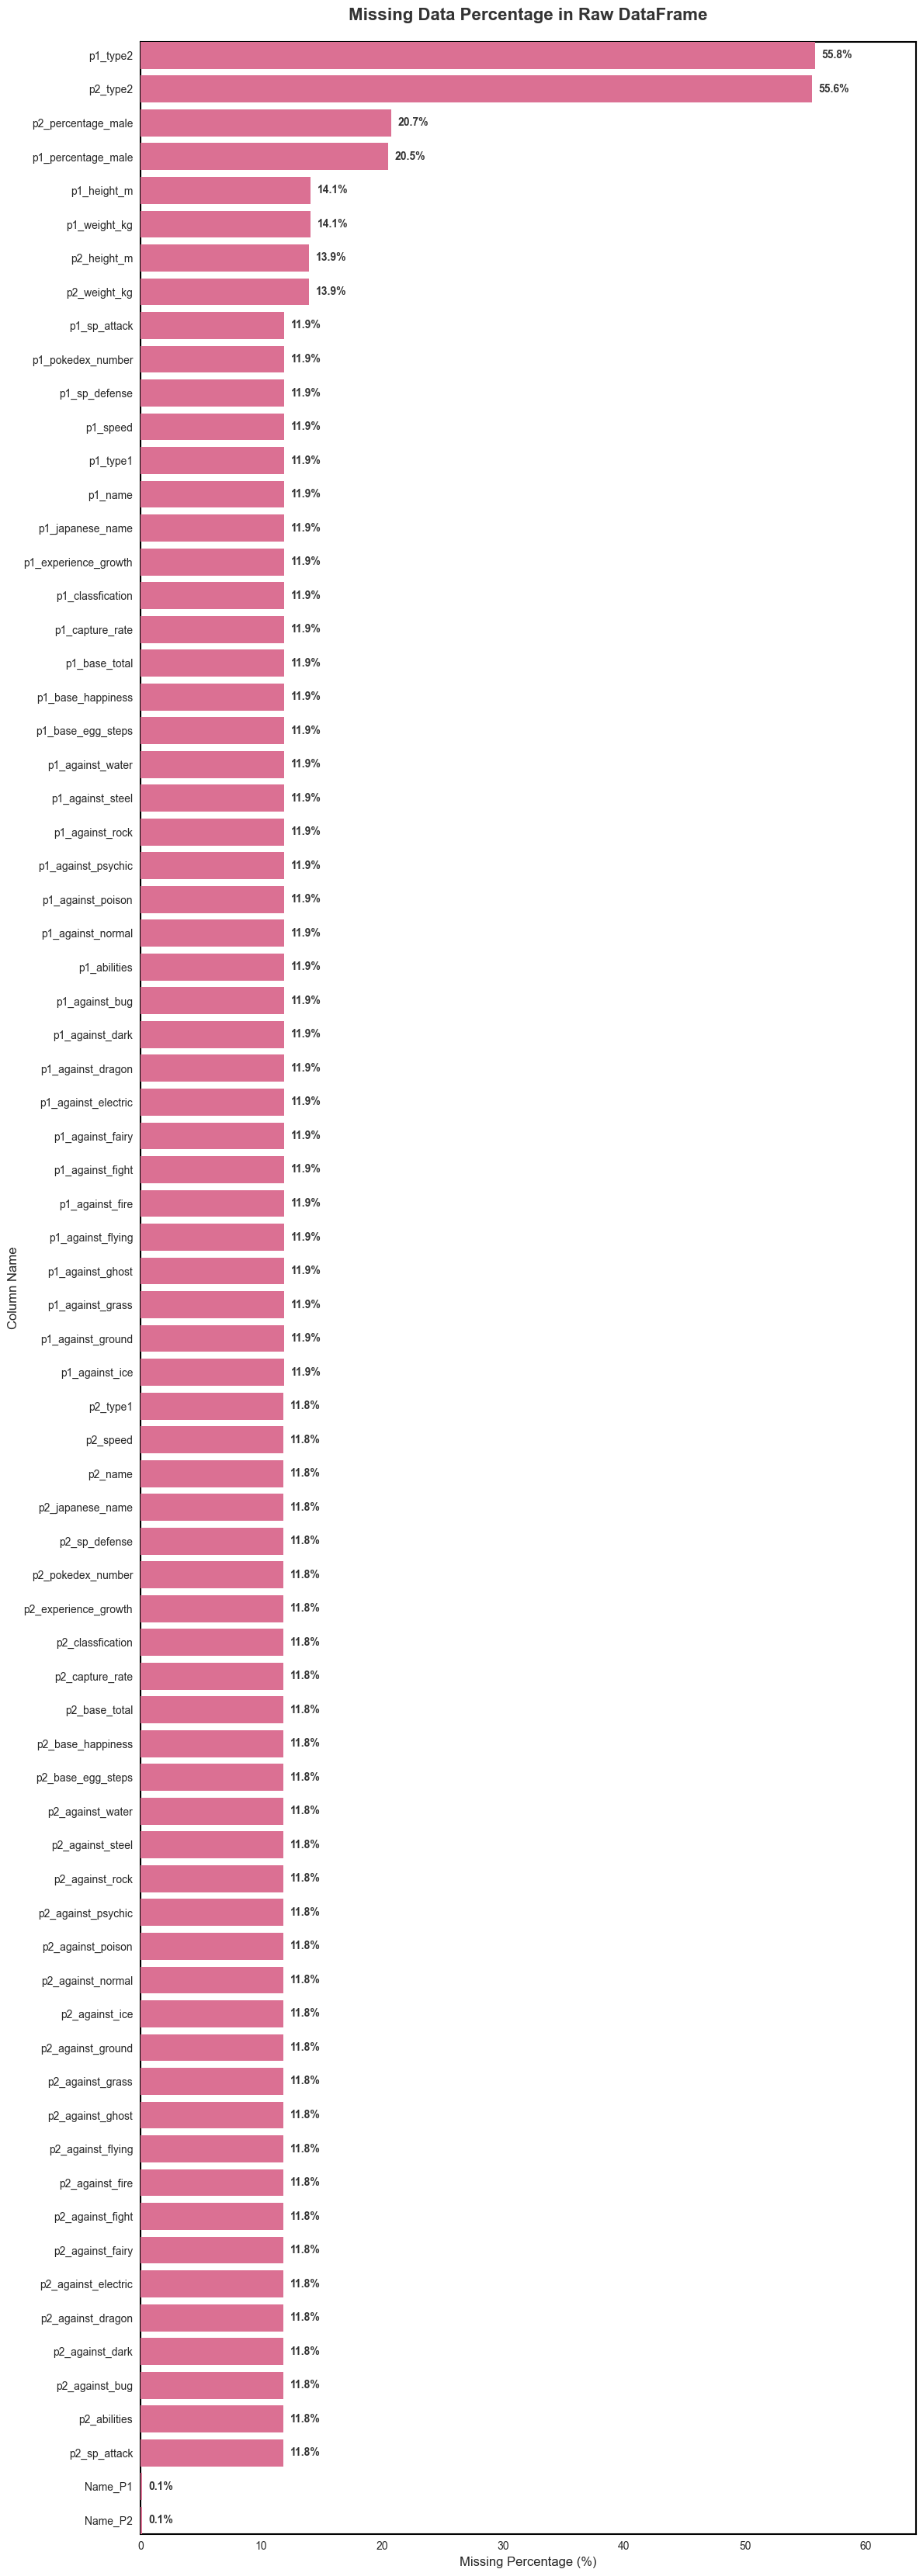

In [9]:
plot_missing_data(df)

#### **UNIQUE AND NUNIQUE**

In [10]:
df.apply(lambda x: x.unique())

First_pokemon     [266, 702, 191, 237, 151, 657, 192, 73, 220, 3...
Second_pokemon    [298, 701, 668, 683, 231, 752, 134, 545, 763, ...
Winner            [298.0, 701.0, 668.0, 683.0, 151.0, 657.0, 134...
Name_P1           [Larvitar, Virizion, Togetic, Slugma, Omastar,...
HP_P1             [50, 91, 55, 40, 70, 100, 130, 45, 95, 64, 110...
                                        ...                        
p2_sp_defense     [40.0, 90.0, 95.0, 230.0, nan, 63.0, 50.0, 55....
p2_speed          [60.0, 108.0, 40.0, 48.0, 5.0, nan, 95.0, 44.0...
p2_type1          [grass, rock, psychic, dragon, bug, nan, ice, ...
p2_type2          [dark, fighting, nan, rock, psychic, ground, f...
p2_weight_kg      [28.0, 260.0, 34.5, 139.0, 20.5, nan, 40.6, 8....
Length: 87, dtype: object

In [11]:
df.nunique()

First_pokemon     784
Second_pokemon    784
Winner            783
Name_P1           783
HP_P1              92
                 ... 
p2_sp_defense      92
p2_speed          103
p2_type1           18
p2_type2           18
p2_weight_kg      384
Length: 87, dtype: int64

In [12]:
df.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', 'Name_P1', 'HP_P1',
       'Attack_P1', 'Defense_P1', 'Generation_P1', 'Legendary_P1', 'Name_P2',
       'HP_P2', 'Attack_P2', 'Defense_P2', 'Generation_P2', 'Legendary_P2',
       'p1_abilities', 'p1_against_bug', 'p1_against_dark',
       'p1_against_dragon', 'p1_against_electric', 'p1_against_fairy',
       'p1_against_fight', 'p1_against_fire', 'p1_against_flying',
       'p1_against_ghost', 'p1_against_grass', 'p1_against_ground',
       'p1_against_ice', 'p1_against_normal', 'p1_against_poison',
       'p1_against_psychic', 'p1_against_rock', 'p1_against_steel',
       'p1_against_water', 'p1_base_egg_steps', 'p1_base_happiness',
       'p1_base_total', 'p1_capture_rate', 'p1_classfication',
       'p1_experience_growth', 'p1_height_m', 'p1_japanese_name', 'p1_name',
       'p1_percentage_male', 'p1_pokedex_number', 'p1_sp_attack',
       'p1_sp_defense', 'p1_speed', 'p1_type1', 'p1_type2', 'p1_weight_kg',
       'p2_abilities',

**Type1 and Type2 of Pokemon 1**

In [13]:
type1_counts = df["p1_type1"].value_counts().reset_index()
type2_counts = df["p1_type2"].value_counts().reset_index()

type1_counts.columns = ["Type1", "Count_Type1"]
type2_counts.columns = ["Type2", "Count_Type2"]

result = pd.concat([type1_counts, type2_counts], axis=1)
result


,Type1,Count_Type1,Type2,Count_Type2
0,water,6566,flying,5346
1,normal,5653,poison,2035
2,bug,3958,ground,1984
3,grass,3942,psychic,1647
4,psychic,2886,dark,1282
5,fire,2881,fighting,1170
6,rock,2689,steel,1155
7,electric,2077,fairy,1088
8,poison,1938,grass,953
9,ground,1742,rock,918


In [14]:
df.groupby('p1_type1')['p1_type2'].value_counts().to_frame()

count
p1_type1 p1_type2       
bug      flying      839
         poison      665
         steel       335
         grass       321
         rock        191
...                  ...
water    fairy       135
         electric    106
         fighting     74
         ghost        68
         steel        58

[130 rows x 1 columns]

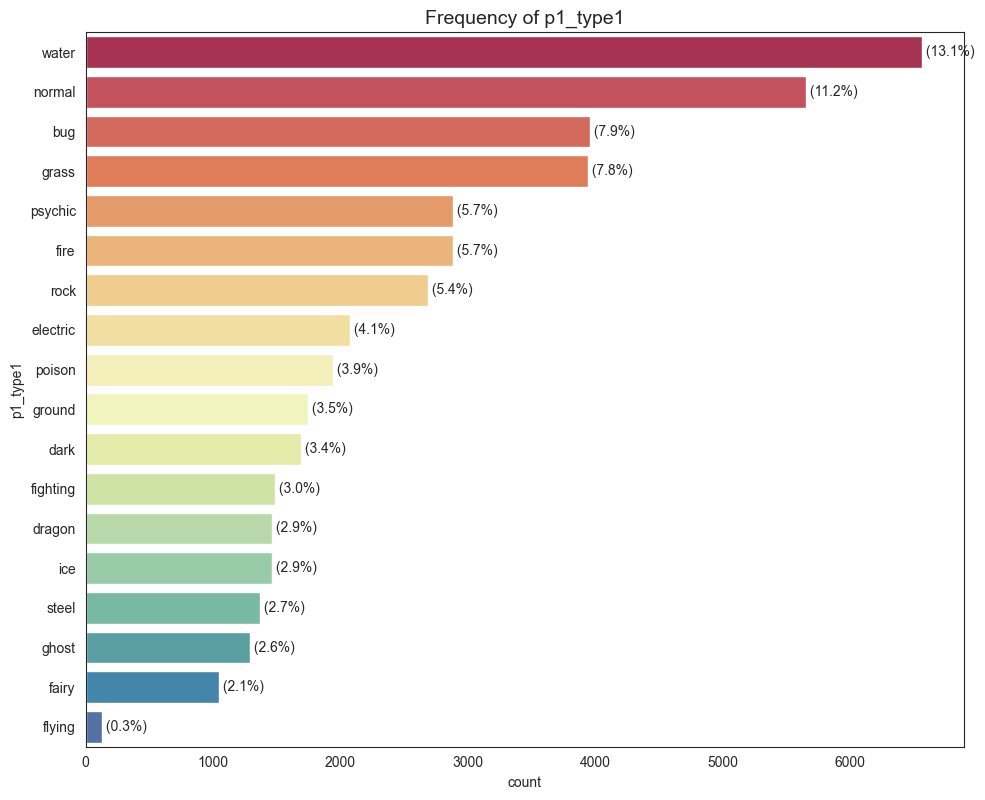

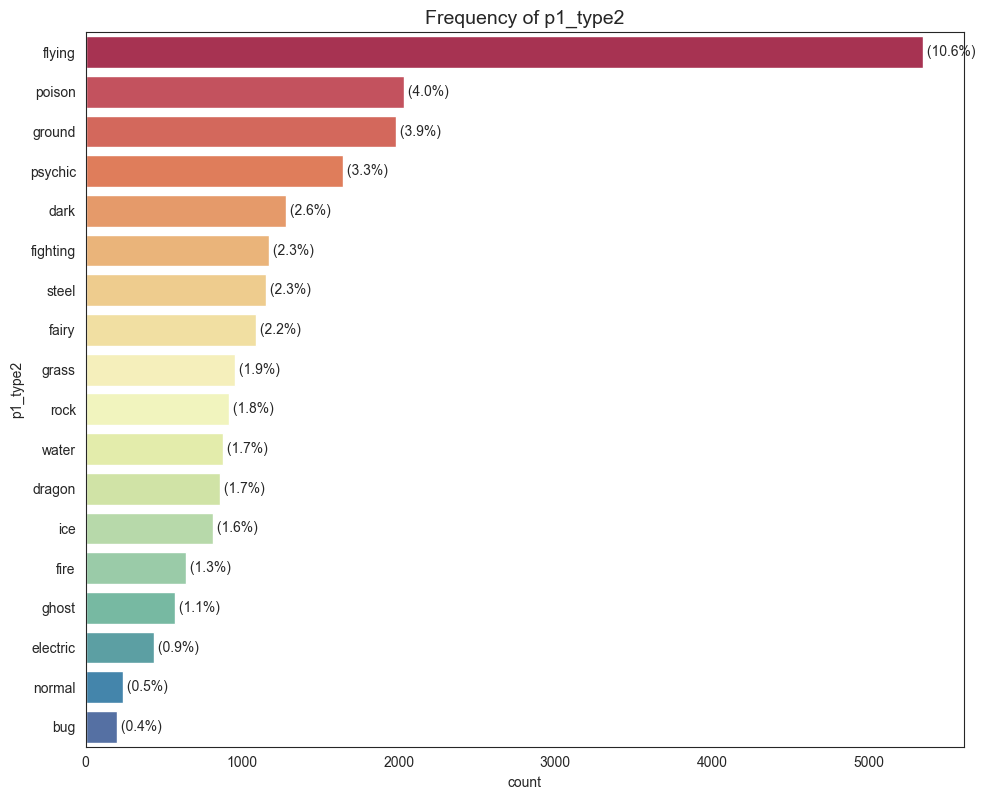

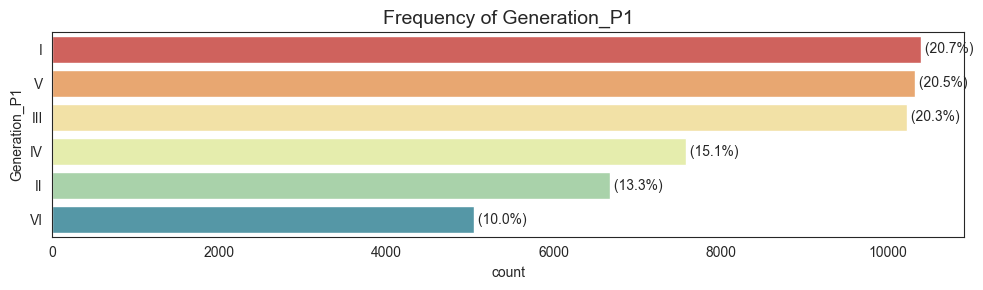

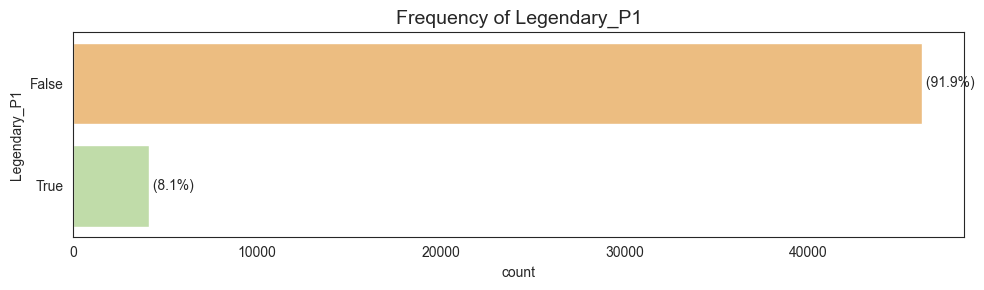

In [15]:
def plot_categorical(df: pd.DataFrame, categorical_cols):
    """
    Generates Bar Charts with dynamic height adjustment based on the number of categories.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_cols (List[str]): List of categorical columns to plot.
    """

    for col in categorical_cols:
        if col not in df.columns:
            print(f"Warning: Column '{col}' does not exist in the DataFrame and was skipped.")
            continue

        N_categories = df[col].nunique()
        dynamic_height = max(3, N_categories * 0.45) 
        plt.figure(figsize=(10, dynamic_height)) 

        order = df[col].value_counts().index

        sns.countplot(
            data=df, 
            y=col, 
            order=order, 
            palette='Spectral' 
        )

        total = len(df)
        plt.title(f'Frequency of {col}', fontsize=14)
        plt.ylabel(col)
        
        for index, value in enumerate(df[col].value_counts()):
            percentage = f' ({value / total:.1%})'
            plt.text(value, index, percentage, va='center', fontsize=10)
        plt.tight_layout()
        plt.show()


CATEGORICAL_COLS_TO_PLOT = [
    'p1_type1', 'p1_type2',
    'Generation_P1',
    'Legendary_P1'
]
plot_categorical(df, CATEGORICAL_COLS_TO_PLOT)

**Generation**

In [16]:
df["Generation_P1"].value_counts().to_frame()

,count
Generation_P1,
I,10396
V,10324
III,10225
IV,7585
II,6677
VI,5048


**Legendary**

In [17]:
df["Legendary_P1"].value_counts().to_frame()

,count
Legendary_P1,
False,46161
True,4094


**Base Egg Steps**

In [18]:
df["p1_base_egg_steps"].value_counts().to_frame()

,count
p1_base_egg_steps,
5120.0,25131
3840.0,6791
6400.0,3396
10240.0,2448
7680.0,1688
30720.0,1625
2560.0,1250
20480.0,960
8960.0,852


**Base Happiness**

In [19]:
df["p1_base_happiness"].value_counts().to_frame()

,count
p1_base_happiness,
70.0,37335
35.0,4315
0.0,1181
100.0,691
140.0,633
90.0,122


**Catch Rate**

In [20]:
df["p1_capture_rate"].value_counts().to_frame()

,count
p1_capture_rate,
45.0,13920
190.0,4429
255.0,3948
75.0,3451
120.0,3169
3.0,2637
60.0,2513
90.0,2250
30.0,1103


**Experience to Growth**

In [21]:
df["p2_experience_growth"].value_counts().to_frame()

,count
p2_experience_growth,
1000000.0,18225
1059860.0,11710
1250000.0,8999
800000.0,3277
600000.0,1304
1640000.0,806


#### **NUMERICAL COLUMNS**

In [22]:
def plot_histograms(
    df: pd.DataFrame, 
    numerical_cols: list,
    cols_per_row: int = 3
):
    n = len(numerical_cols)
    rows = (n + cols_per_row - 1) // cols_per_row 
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    if n > 0:
        axes = np.ravel(axes) if rows > 1 or cols_per_row > 1 else np.array([axes])

    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        data = df[col].dropna() 
        
        if data.empty:
            ax.text(0.5, 0.5, "NaN", ha="center", transform=ax.transAxes)
            ax.set_title(col, fontsize=11, fontweight='bold')
            ax.axis("off")
            continue
        sns.histplot(data, bins=30, ax=ax, color="#244D8E", edgecolor="black")
        ax.set_title(f"Distribution of {col}", fontsize=11, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)

        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    for j in range(n, len(axes)):
        axes[j].axis("off")
    plt.tight_layout() 
    plt.show()

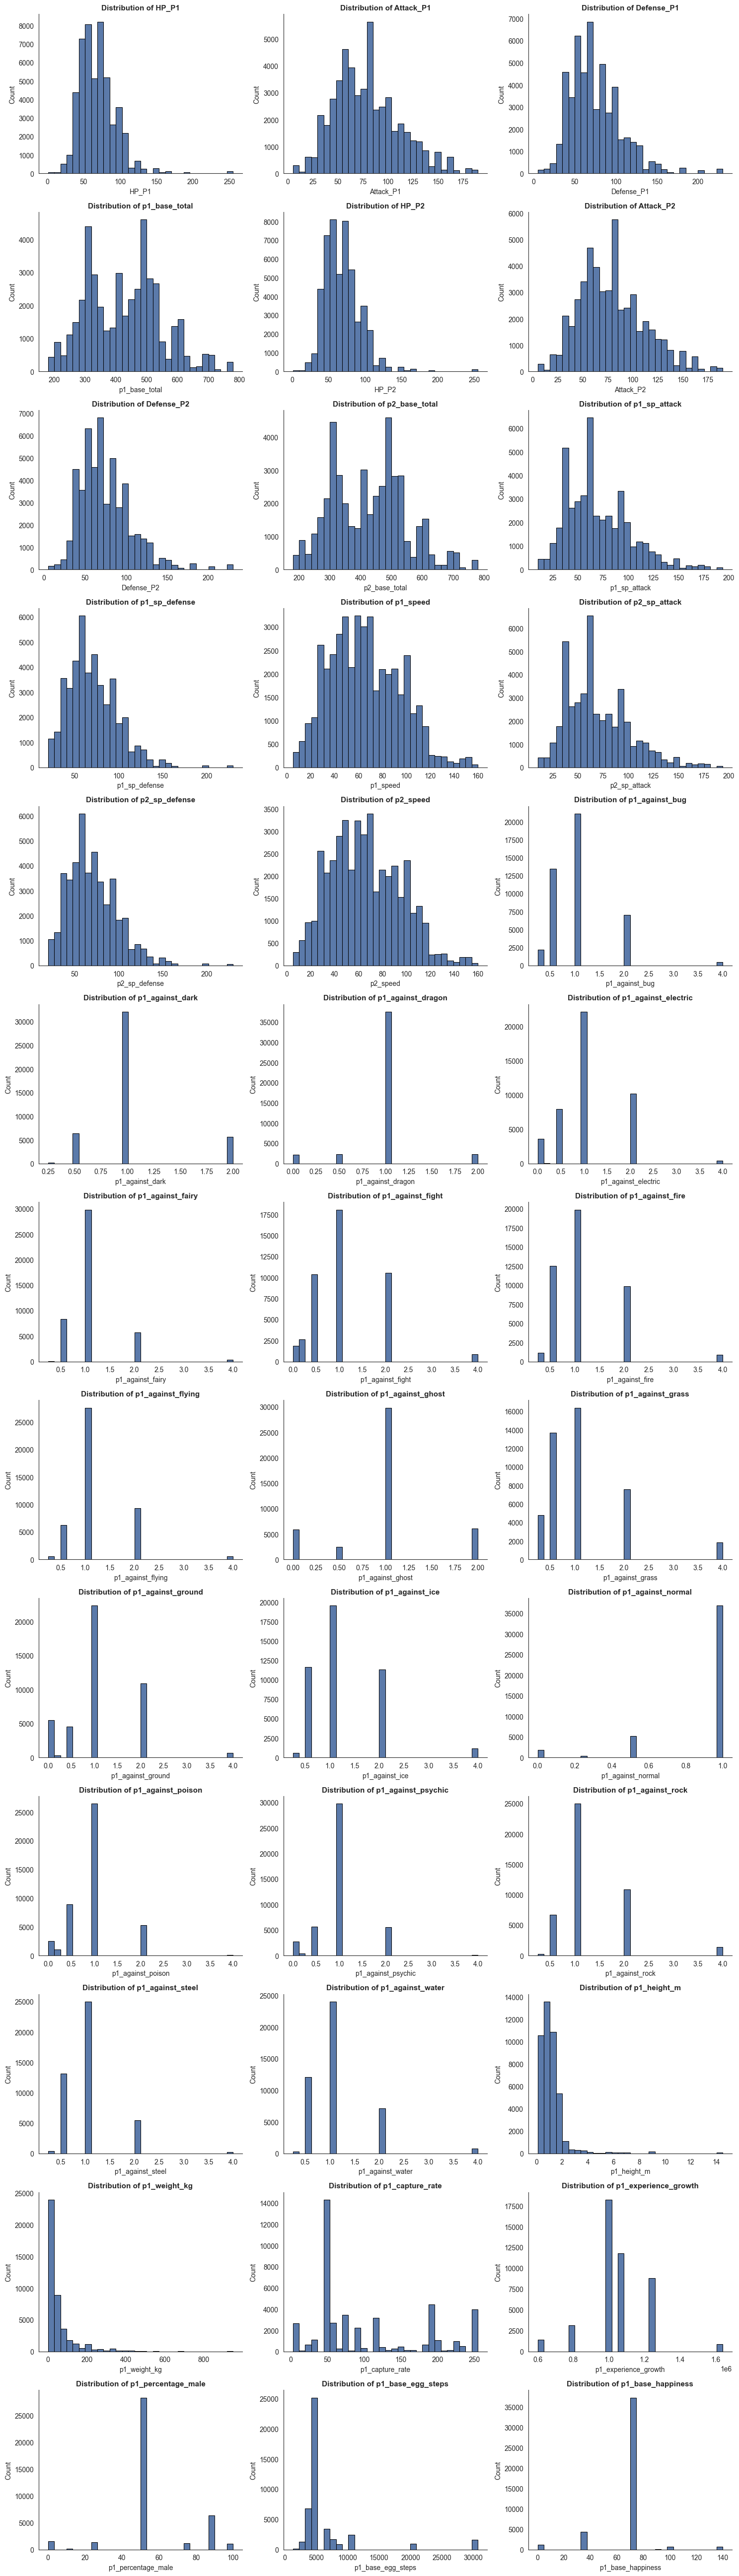

In [23]:
columns_histogram = [
        'HP_P1', 'Attack_P1', 'Defense_P1', 'p1_base_total',  'HP_P2', 'Attack_P2', 'Defense_P2', 'p2_base_total', 
        'p1_sp_attack', 'p1_sp_defense', 'p1_speed', 'p2_sp_attack', 'p2_sp_defense', 'p2_speed',  'p1_against_bug', 
        'p1_against_dark', 'p1_against_dragon', 'p1_against_electric', 'p1_against_fairy', 'p1_against_fight', 'p1_against_fire', 
        'p1_against_flying', 'p1_against_ghost', 'p1_against_grass', 'p1_against_ground', 'p1_against_ice', 
        'p1_against_normal', 'p1_against_poison', 'p1_against_psychic', 'p1_against_rock', 'p1_against_steel', 
        'p1_against_water',  'p1_height_m', 'p1_weight_kg', 'p1_capture_rate', 'p1_experience_growth', 'p1_percentage_male', 'p1_base_egg_steps', 'p1_base_happiness'
    ]
    
plot_histograms(
    df=df, 
    numerical_cols = columns_histogram, 
    cols_per_row=3
)

**Stats by Types**  
Let's check which Type have the highest Attack, Defense, etc.

In [24]:
def plot_boxplot(
    x_col,
    y_col,
    x_label=None,
    y_label=None
):
    plt.subplots(figsize=(15, 10))

    # Tạo palette dựa vào số nhóm
    palette = sns.color_palette("Spectral", n_colors=df[x_col].nunique())

    sns.boxplot(data=df, x=x_col, y=y_col, palette=palette)

    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.title( f"Distribution of {y_col} by {x_col}")
    plt.ylim(0, 300)
    plt.show()

**HP**

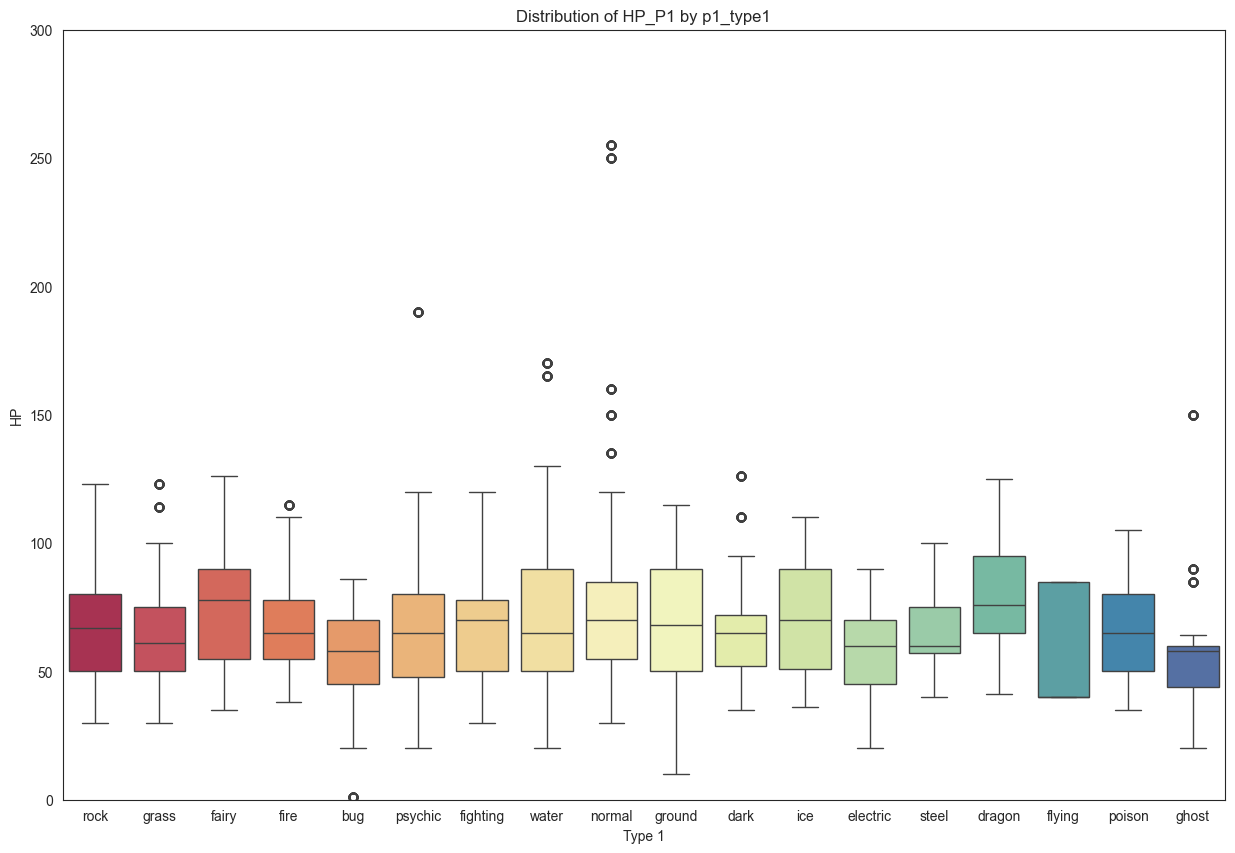

In [25]:
plot_boxplot(
    x_col="p1_type1",
    y_col="HP_P1",
    x_label="Type 1",
    y_label="HP"
)

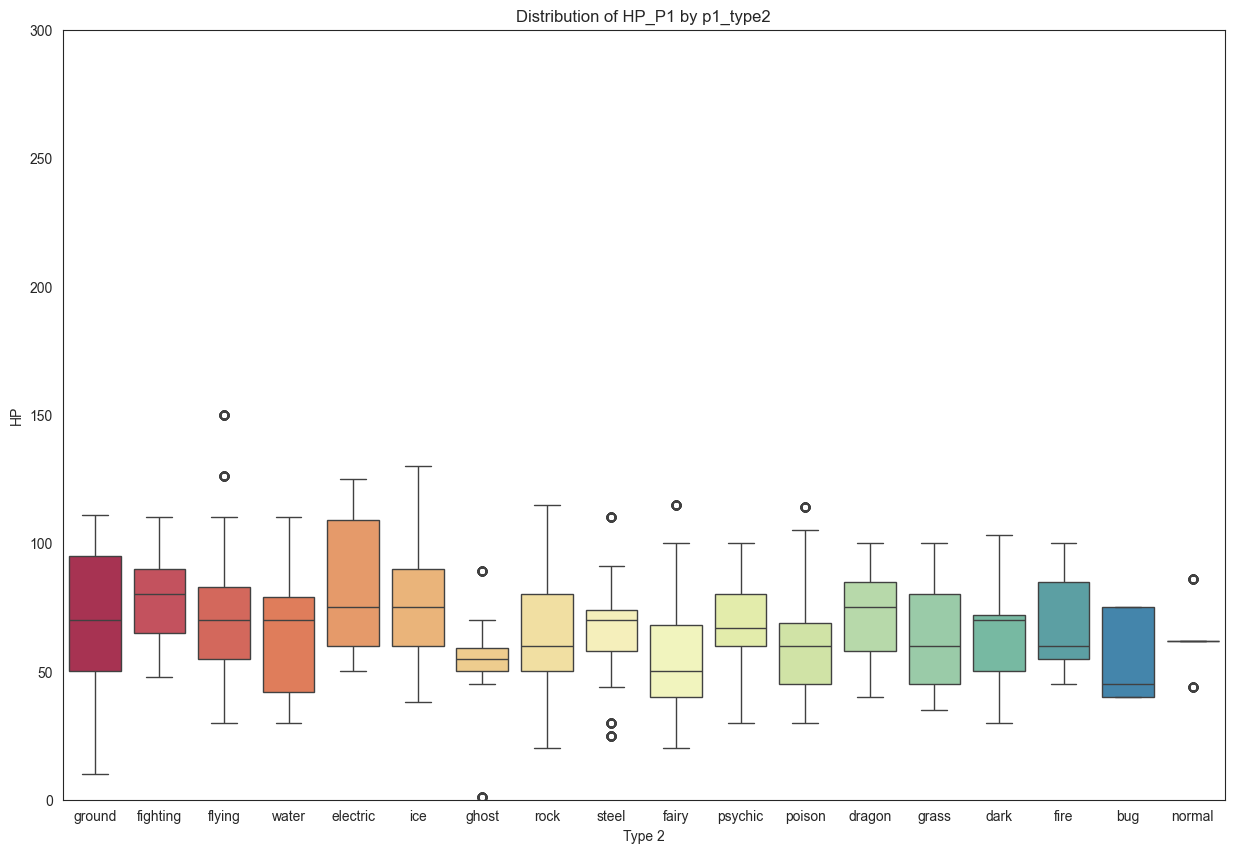

In [26]:
plot_boxplot(
    x_col="p1_type2",
    y_col="HP_P1",
    x_label="Type 2",
    y_label="HP"
)

**Attack**

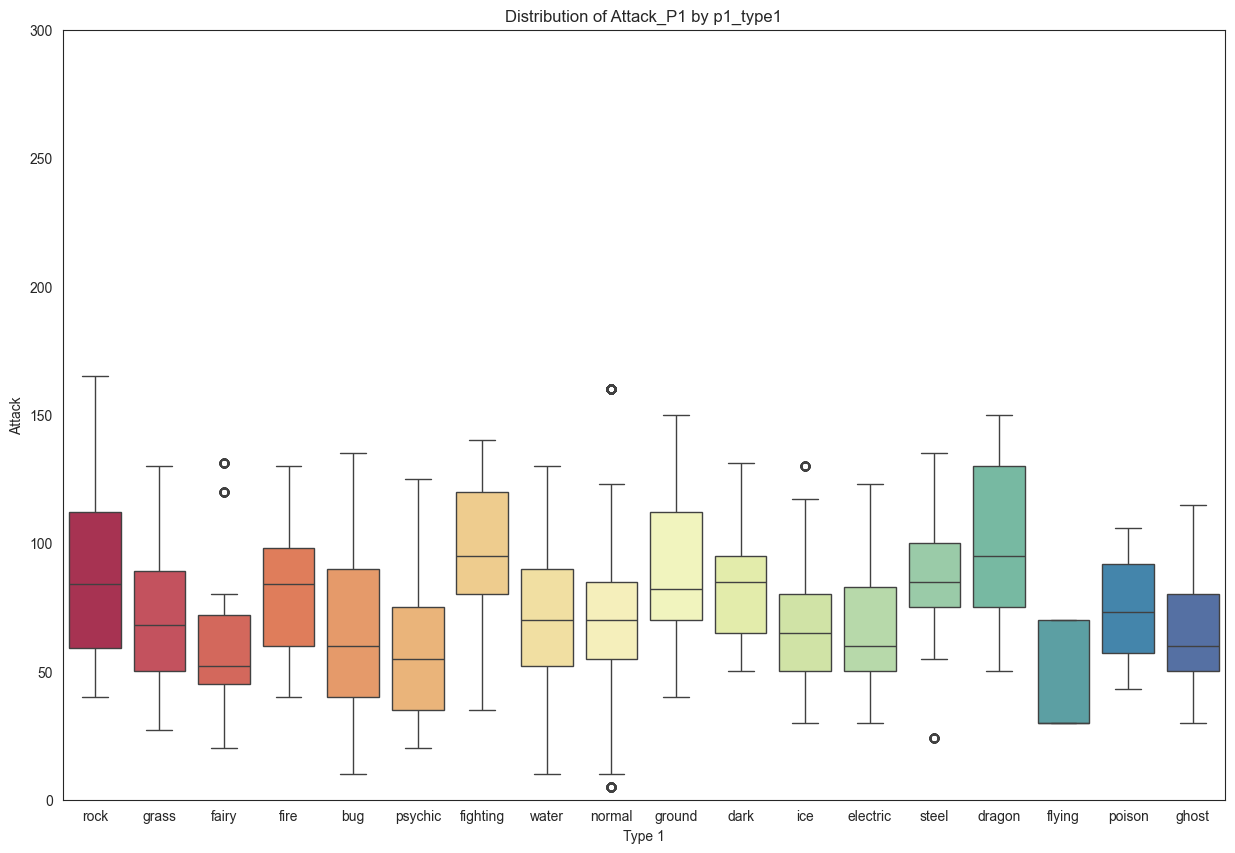

In [27]:
plot_boxplot(
    x_col="p1_type1",
    y_col="Attack_P1",
    x_label="Type 1",
    y_label="Attack"
)

Dragon Pokemon have a higher attack compared to the other types

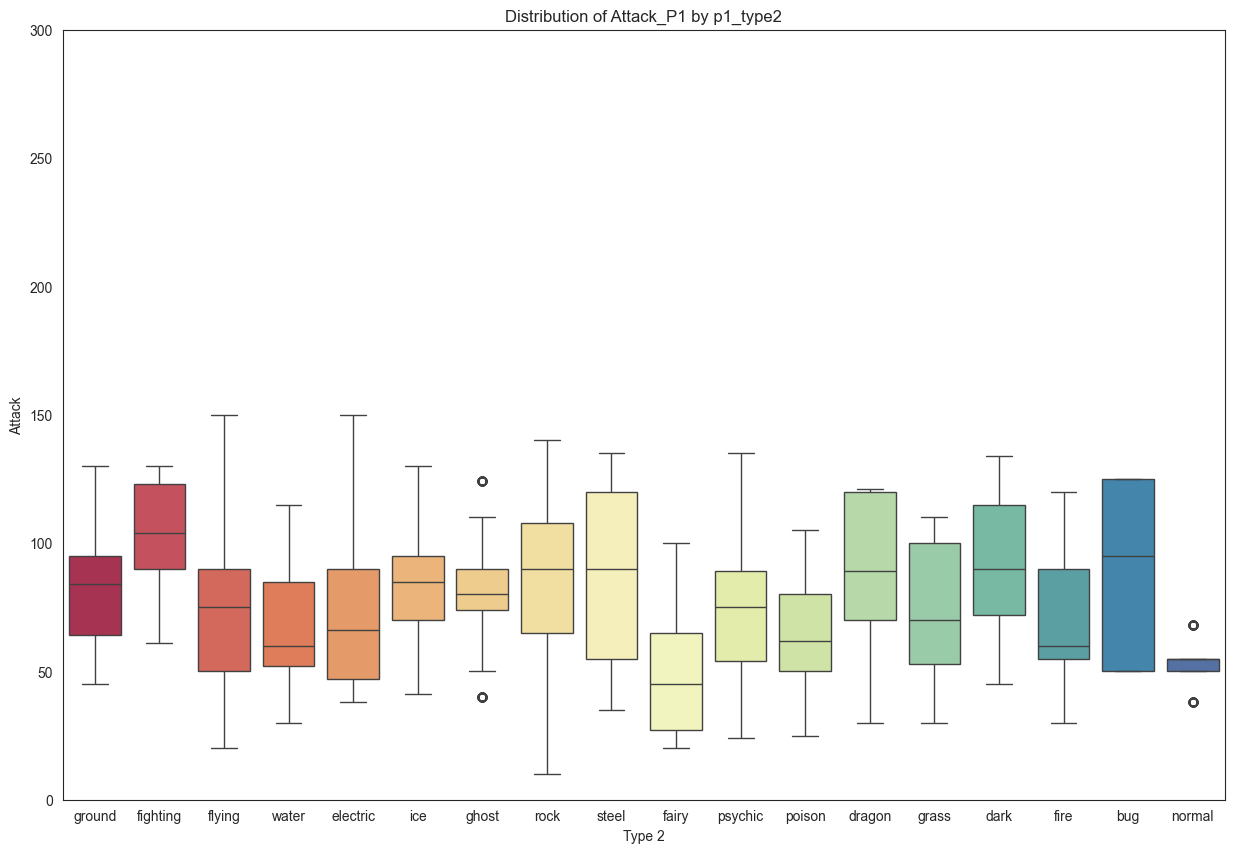

In [28]:
plot_boxplot(
    x_col="p1_type2",
    y_col="Attack_P1",
    x_label="Type 2",
    y_label="Attack"
)

**Defense**

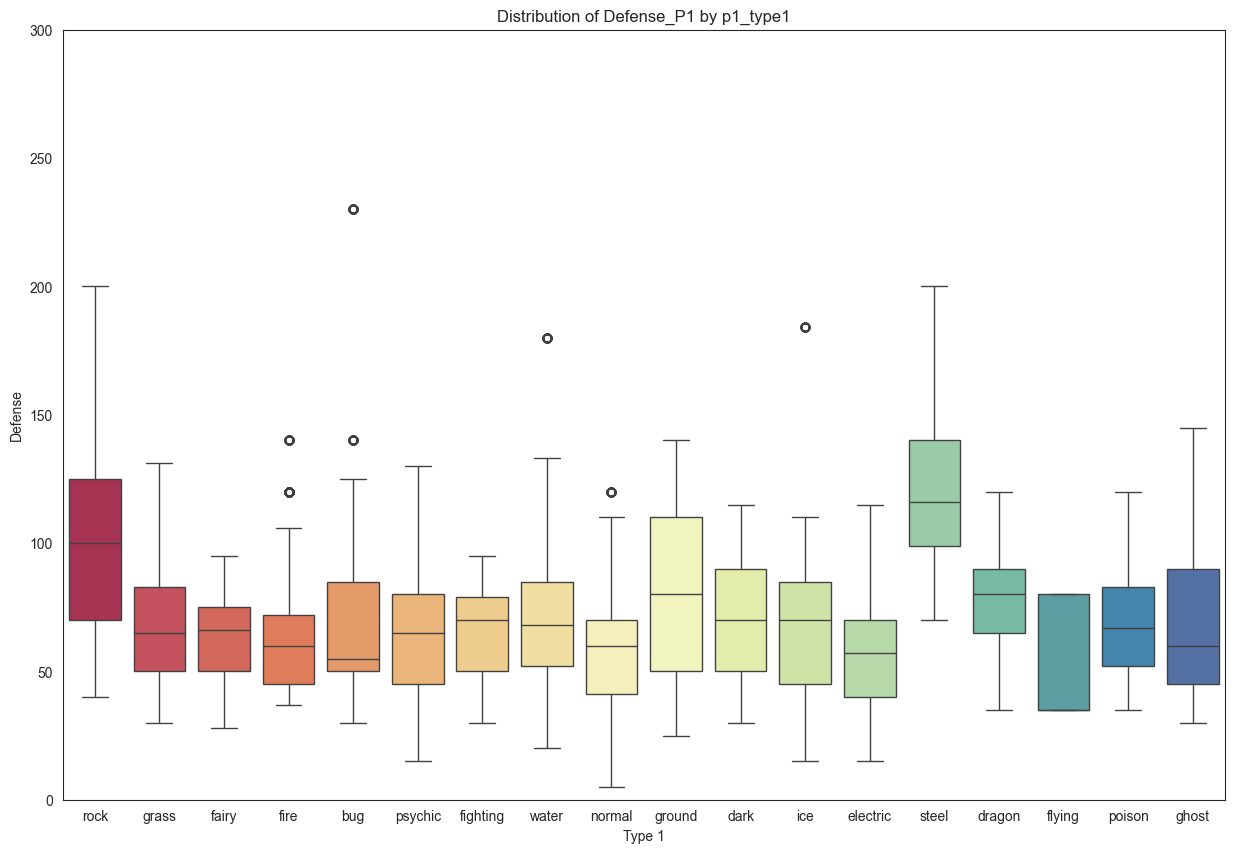

In [29]:
plot_boxplot(
    x_col="p1_type1",
    y_col="Defense_P1",
    x_label="Type 1",
    y_label="Defense"
)

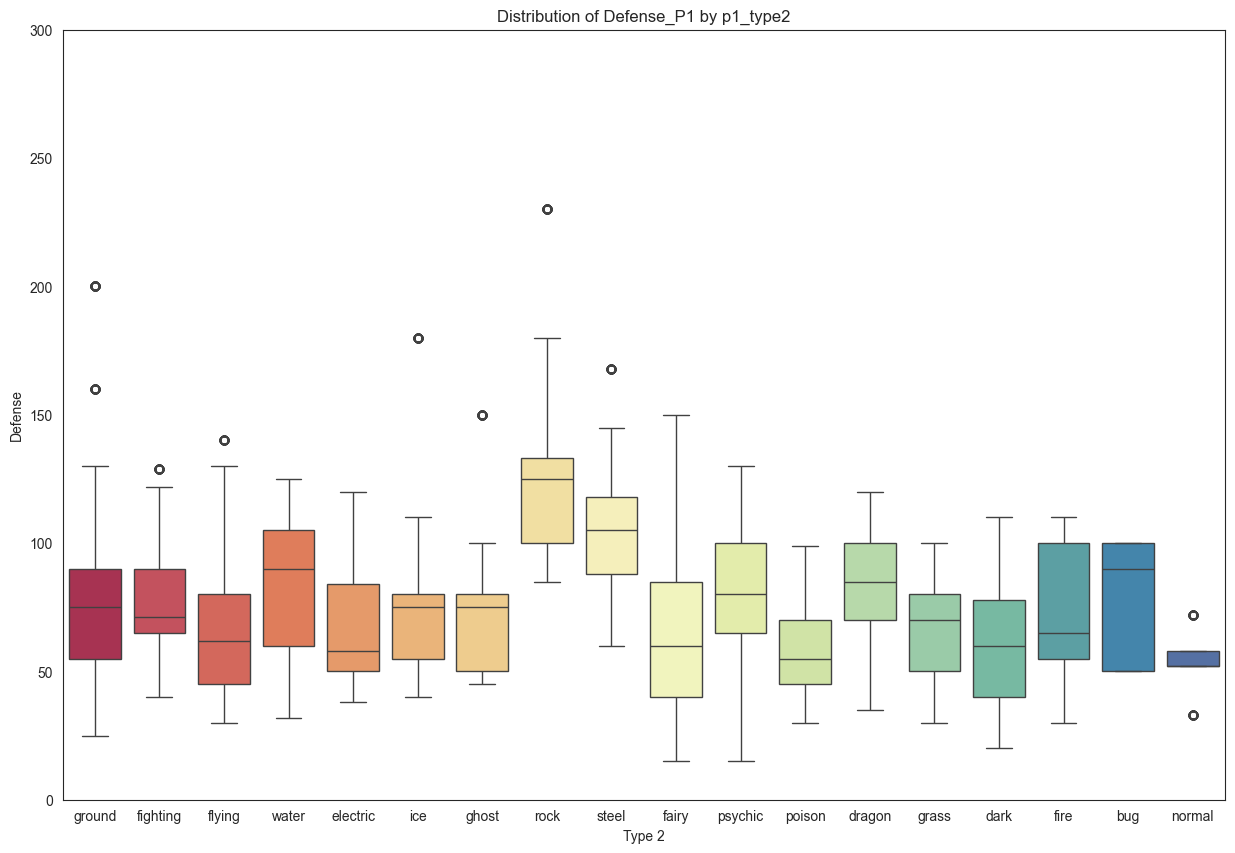

In [30]:
plot_boxplot(
    x_col="p1_type2",
    y_col="Defense_P1",
    x_label="Type 2",
    y_label="Defense"
)

**Special Attack**

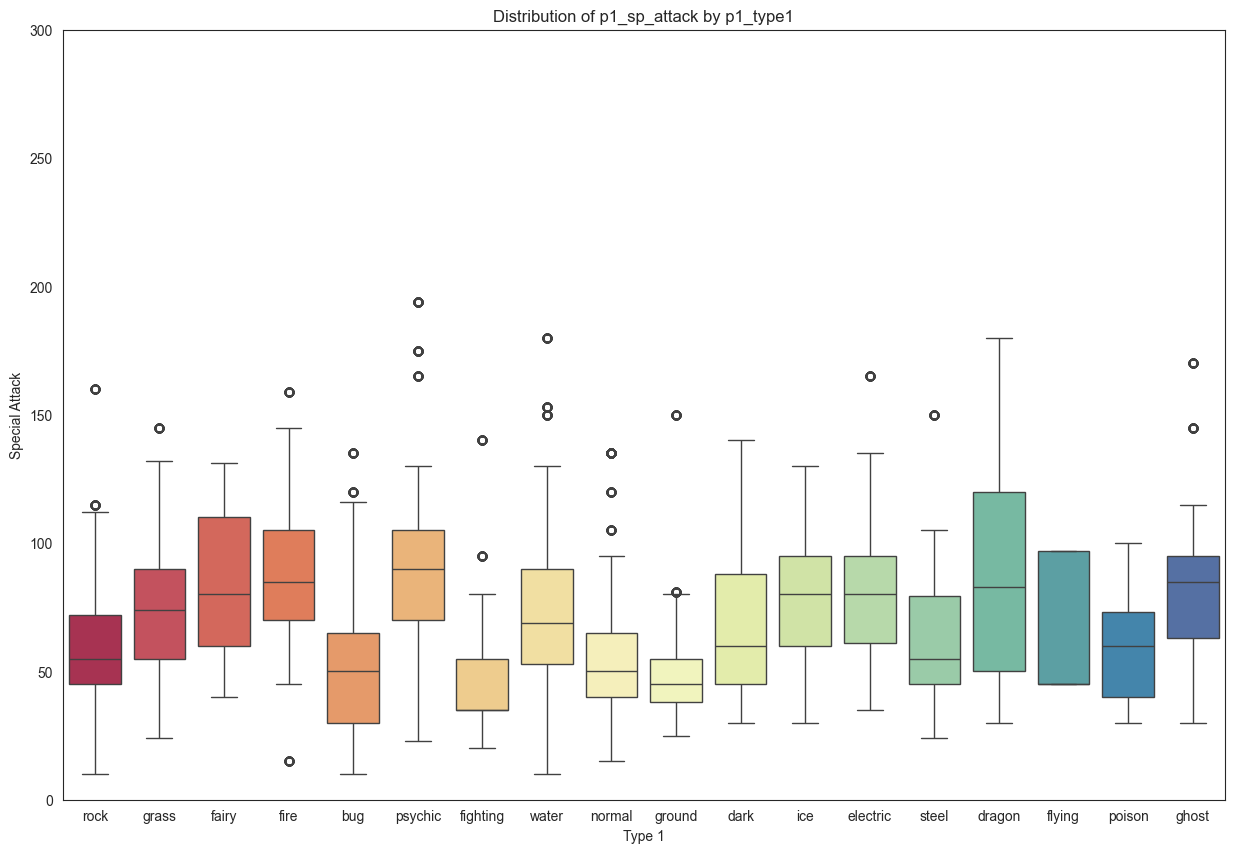

In [31]:
plot_boxplot(x_col="p1_type1", y_col="p1_sp_attack", x_label="Type 1", y_label="Special Attack")

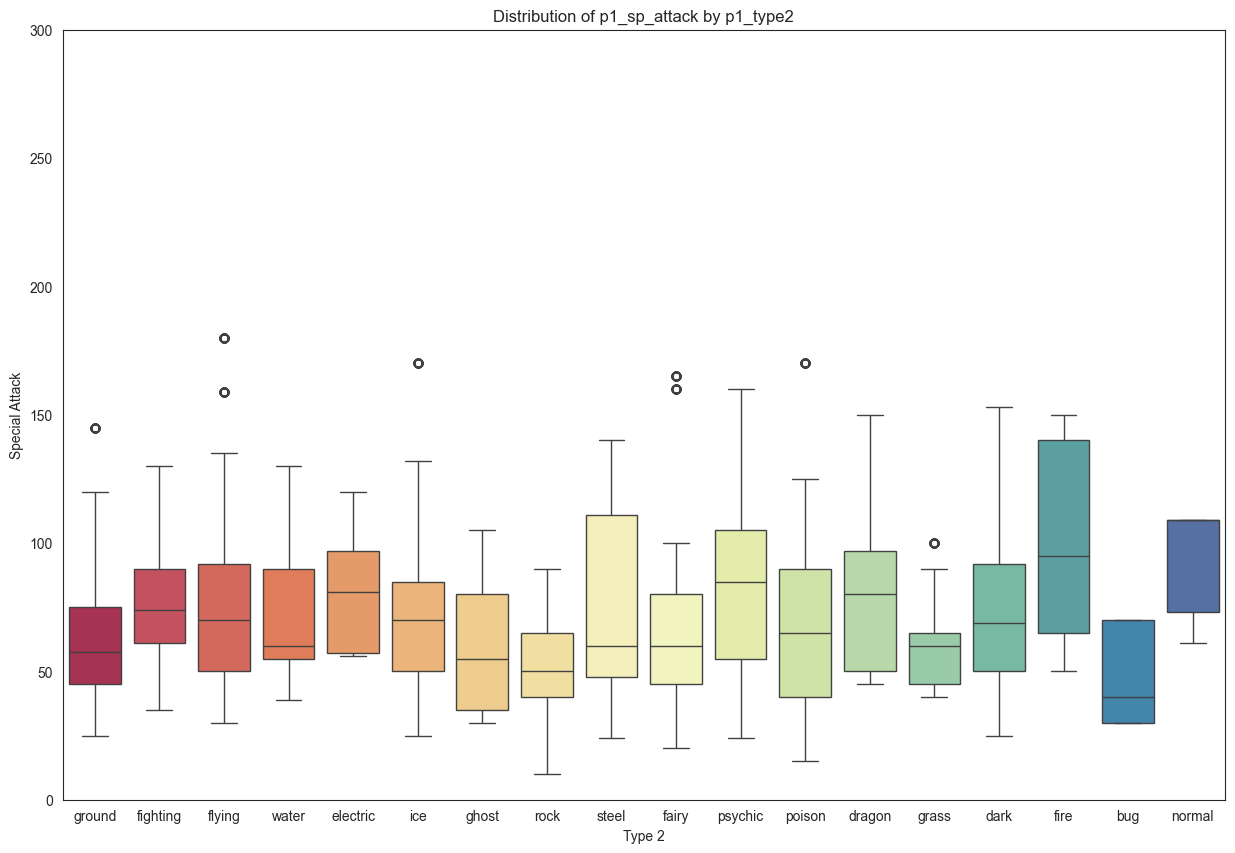

In [32]:
plot_boxplot(x_col="p1_type2", y_col="p1_sp_attack", x_label="Type 2", y_label="Special Attack")

**Special Defense**

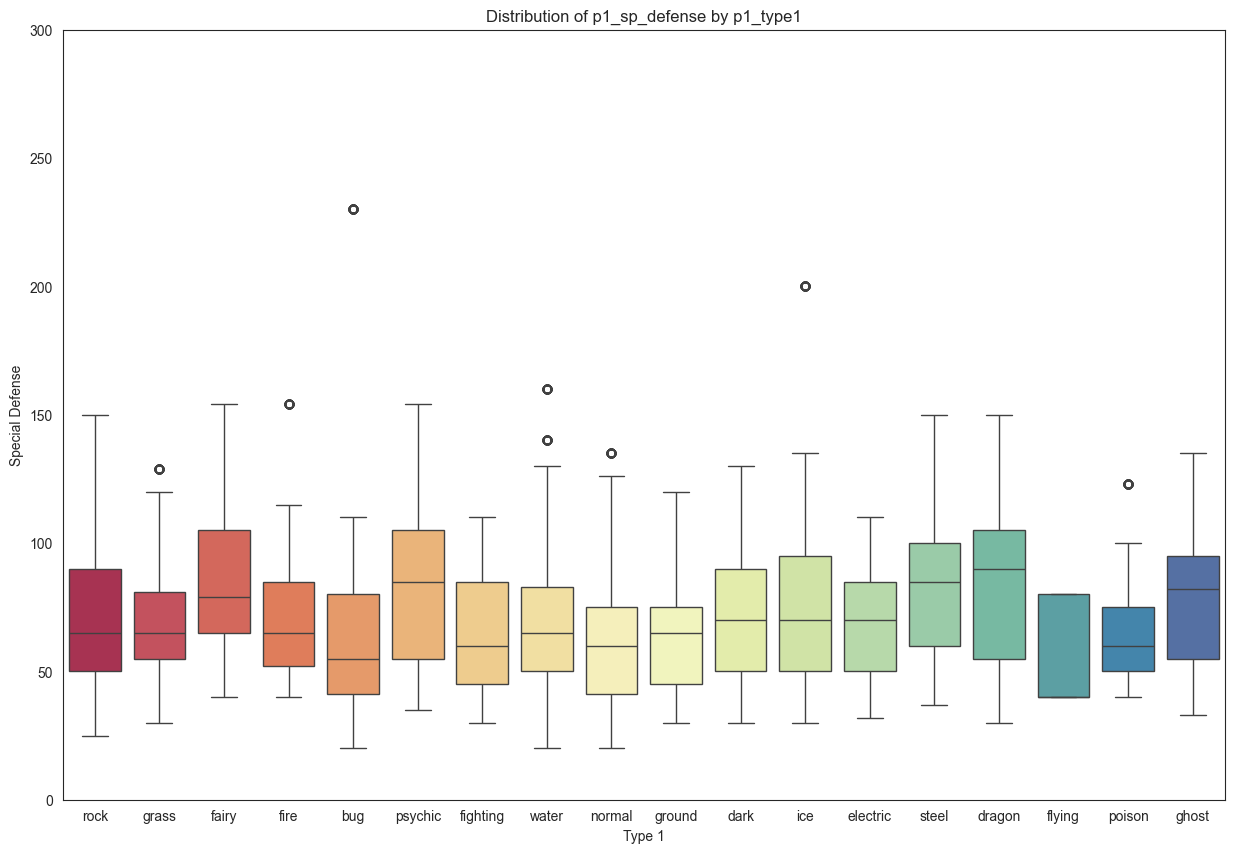

In [33]:
plot_boxplot(x_col="p1_type1", y_col="p1_sp_defense", x_label="Type 1", y_label="Special Defense")

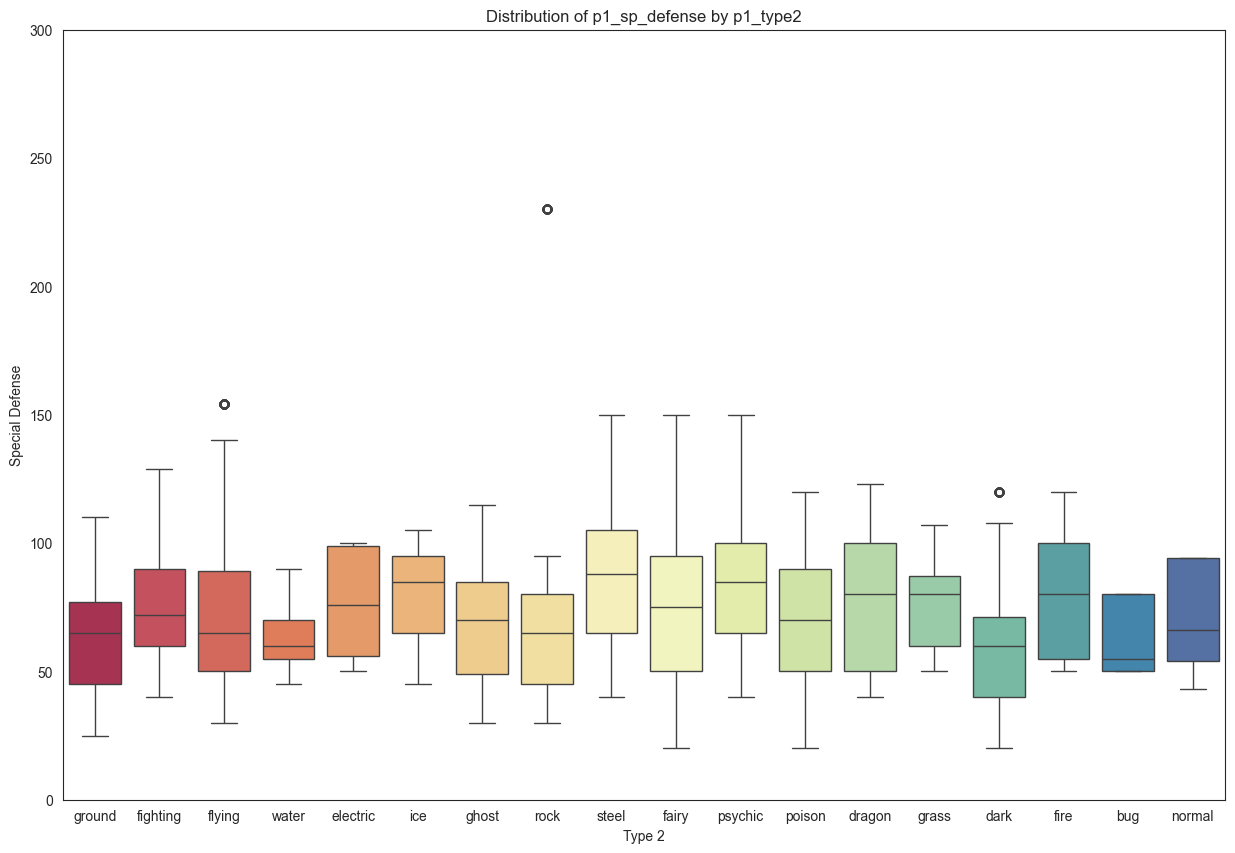

In [34]:
plot_boxplot(x_col="p1_type2", y_col="p1_sp_defense", x_label="Type 2", y_label="Special Defense")

**Speed**

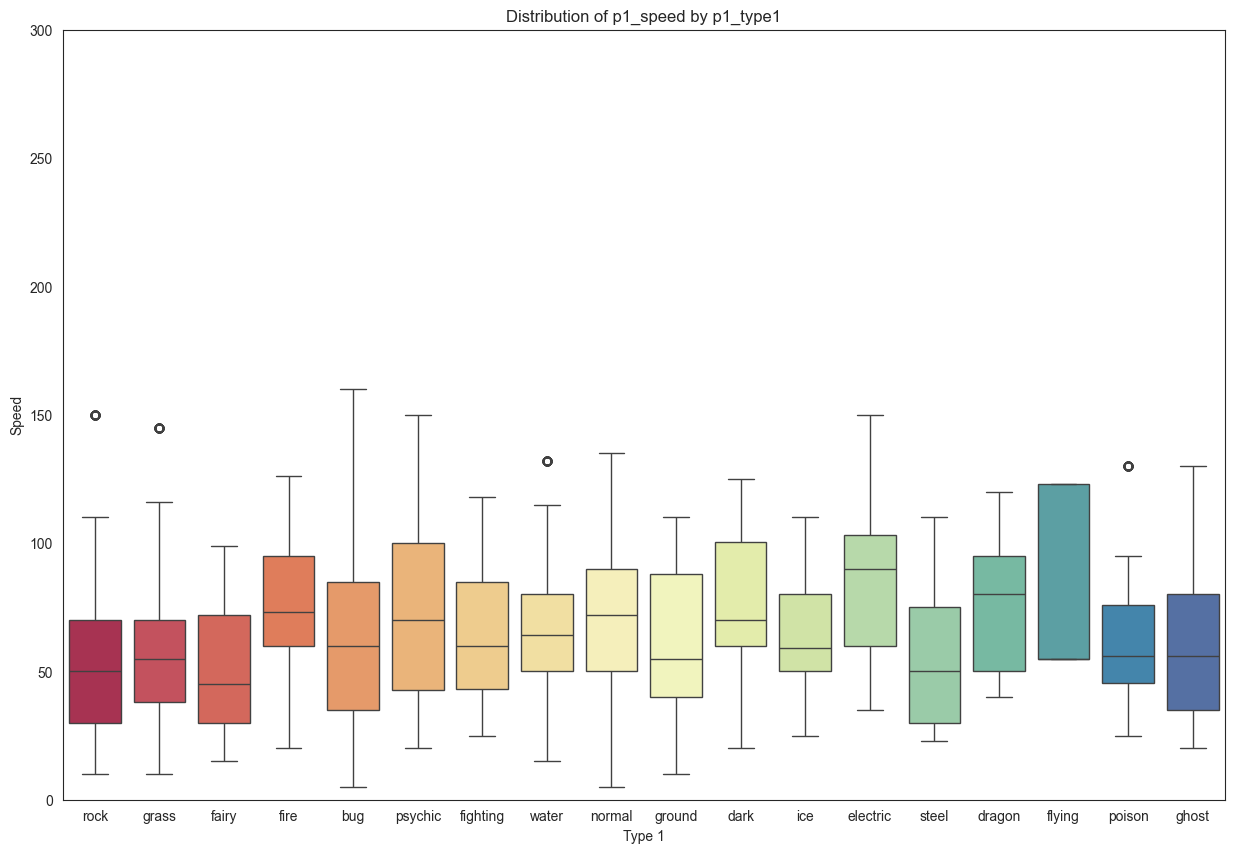

In [35]:
plot_boxplot(x_col="p1_type1", y_col="p1_speed", x_label="Type 1", y_label="Speed")

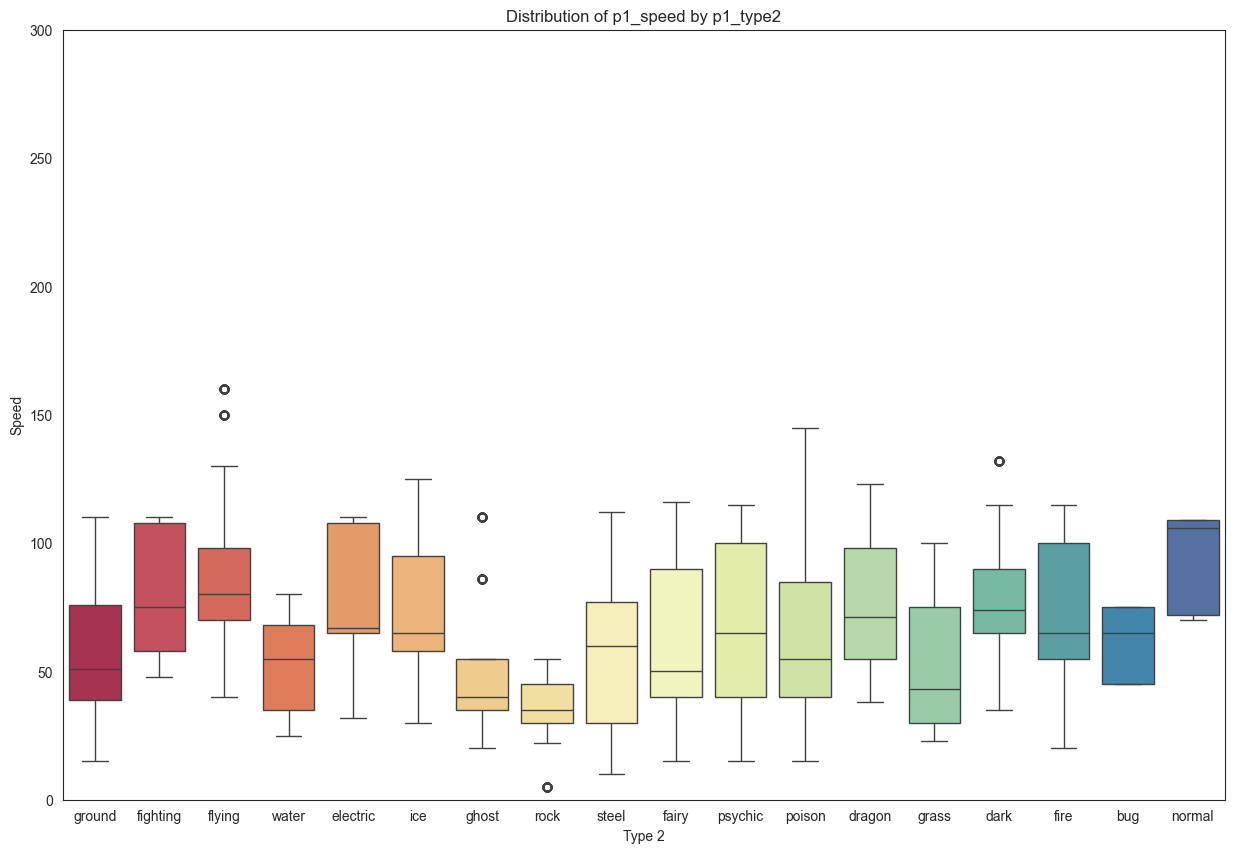

In [36]:
plot_boxplot(x_col="p1_type2", y_col="p1_speed", x_label="Type 2", y_label="Speed")

## **BOXPLOT**

In [37]:
def plot_boxplots(df: pd.DataFrame, stats, cols=3):

    n = len(stats)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, stat in enumerate(stats):
        ax = axes[i]
        sns.boxplot(
            y=df[stat],
            ax=ax,
            color='C0',    
            width=0.3, 
            fliersize=3
        )

        ax.set_title(f'Boxplot {stat}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Value')
        ax.grid(False)  

    for j in range(i + 1, rows * cols):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    plt.close()

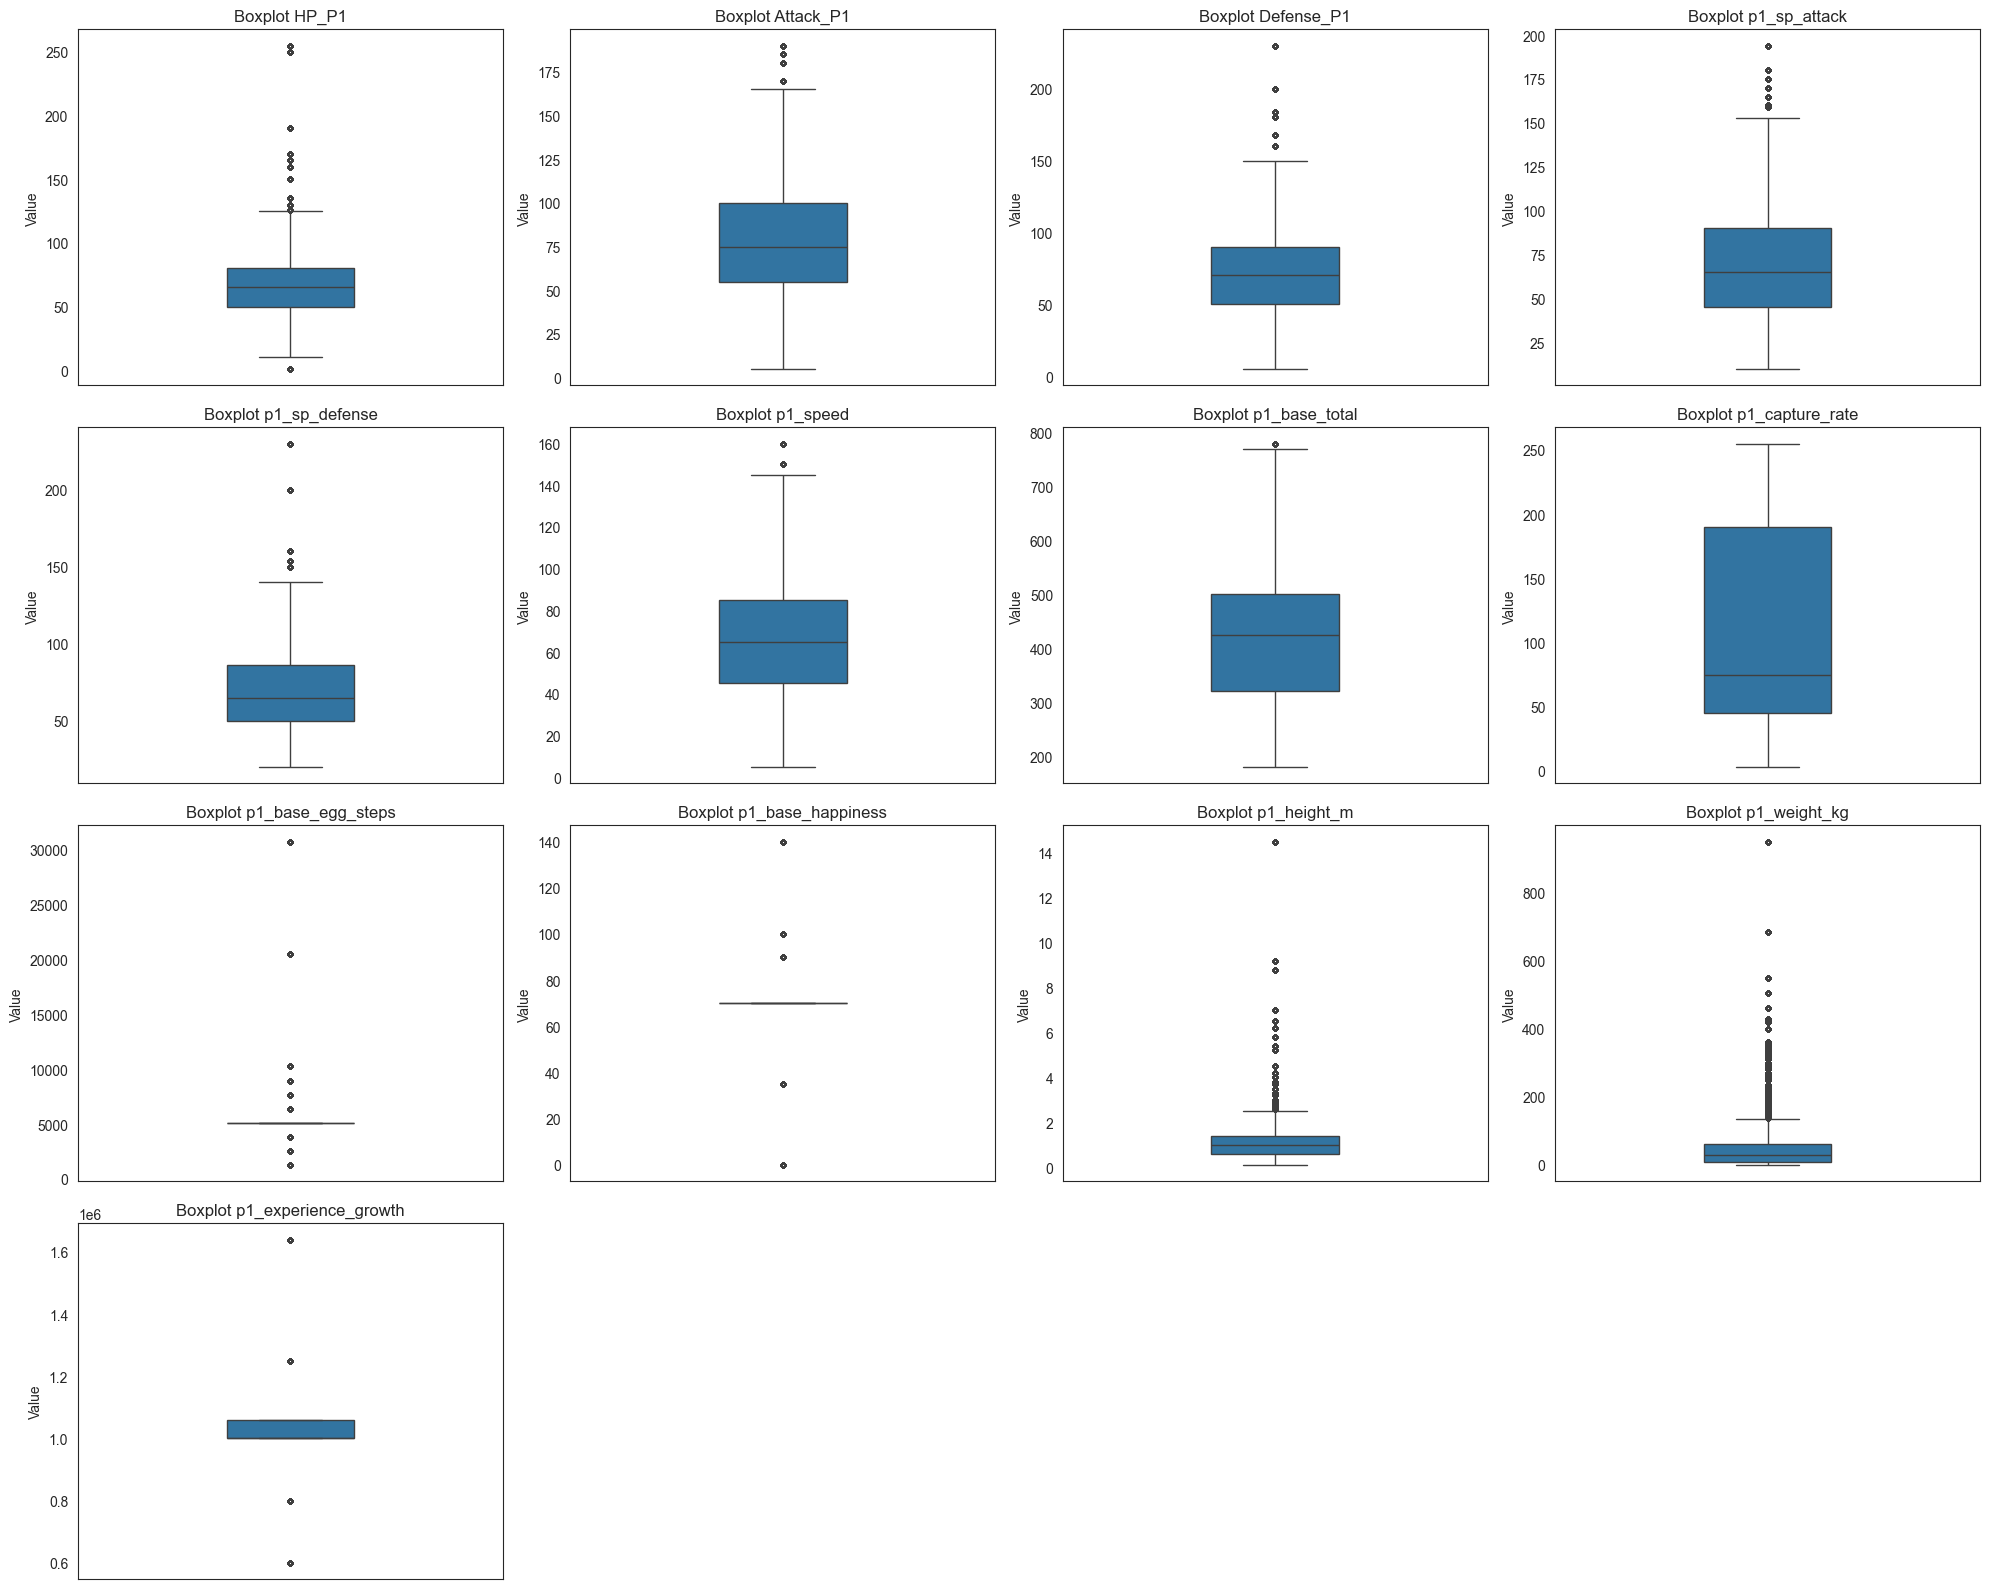

In [38]:
stats = [
    'HP_P1', 'Attack_P1', 'Defense_P1', 'p1_sp_attack', 'p1_sp_defense', 'p1_speed', 
    'p1_base_total', 'p1_capture_rate', 
    'p1_base_egg_steps', 'p1_base_happiness', 'p1_height_m', 'p1_weight_kg', 'p1_experience_growth'
]

plot_boxplots(df, stats, cols=4)

## **HEATMAP**

In [39]:
def plot_correlation_matrix(
    df: pd.DataFrame, 
    columns_list, 
    title: str = 'Pearson Correlation'
):
    """
    Generates a Pearson Correlation Heatmap, displaying only the lower triangle 
    and using a blue color palette.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns_list (List[str]): List of numerical columns for correlation calculation.
        title (str): Title of the chart.
    """

    corr_matrix = df[columns_list].corr(method='pearson') 
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) 

    fig_size = max(8, len(columns_list) * 0.7)
    plt.figure(figsize=(fig_size, fig_size * 0.9)) 

    sns.heatmap(
        corr_matrix, 
        mask=mask,              
        annot=True,             
        fmt=".2f",              
        cmap='RdBu',
        linewidths=.5
    )
    
    plt.title(title, fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


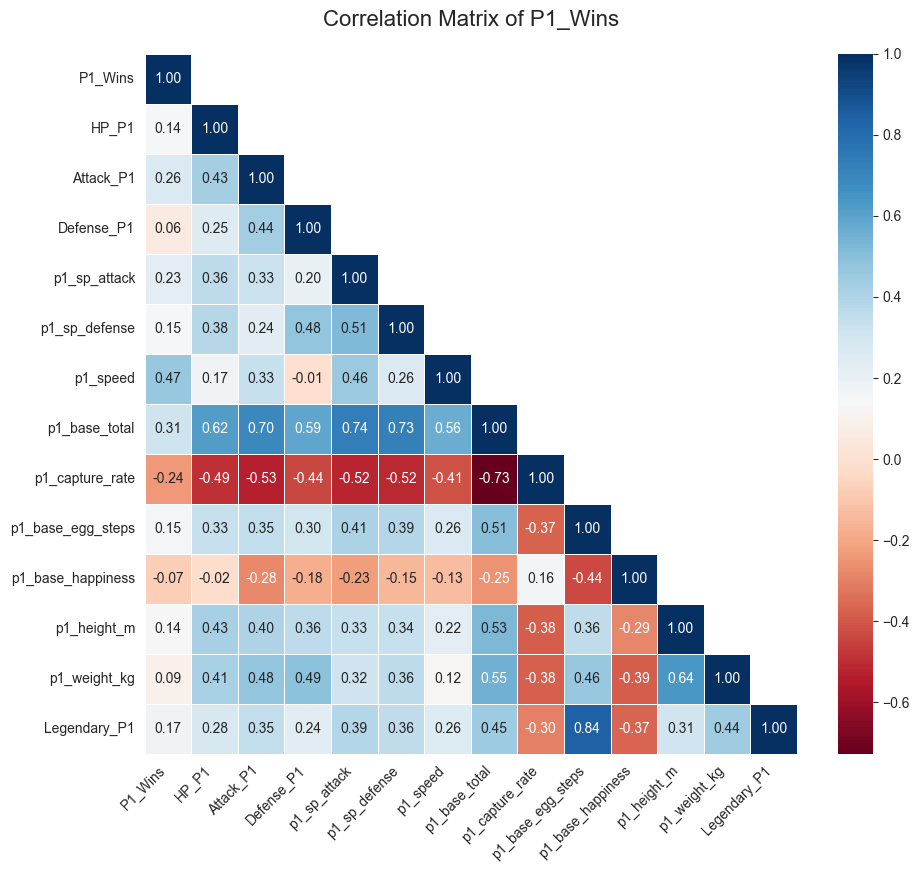

In [40]:
# Tạo tạm cột target để vẽ tương quan, không sử dụng sau này
df['P1_Wins'] = (df['Winner'] == df['First_pokemon']).astype(int)

COMBAT_TARGET_STATS = [
    'P1_Wins' ,
    'HP_P1', 'Attack_P1', 'Defense_P1', 'p1_sp_attack', 'p1_sp_defense', 'p1_speed', 'p1_base_total',
    'p1_capture_rate', 'p1_base_egg_steps', 'p1_base_happiness',
    'p1_height_m', 'p1_weight_kg', 'Legendary_P1' 
]

plot_correlation_matrix(
    df, 
    COMBAT_TARGET_STATS, 
    title='Correlation Matrix of P1_Wins'
)

## **ANALYSIS**

**REMOVE REDUNDANT COLUMNS**

In [ ]:
columns_drop = [
    'First_pokemon', 'Second_pokemon', 'Name_P1', 'Name_P2',
    'p1_japanese_name', 'p2_japanese_name', 'Winner'
]
df.drop(columns = columns_drop, inplace=True)

In [44]:
df = df.set_index('p1_name')
df.head()

,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,HP_P2,Attack_P2,Defense_P2,Generation_P2,Legendary_P2,...,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg,P1_Wins
p1_name,,,,,,,,,,,,,,,,,,,,,
Larvitar,50,64,50,II,False,70,70,40,III,False,...,Nuzleaf,50.0,274.0,60.0,40.0,60.0,grass,dark,28.0,0
Virizion,91,90,72,V,True,91,129,90,V,True,...,Terrakion,NaN,639.0,72.0,90.0,108.0,rock,fighting,260.0,0
Togetic,55,40,85,II,False,75,75,75,V,False,...,Beheeyem,50.0,606.0,125.0,95.0,40.0,psychic,NaN,34.5,0
Slugma,40,40,40,II,False,77,120,90,V,False,...,Druddigon,50.0,621.0,60.0,90.0,48.0,dragon,NaN,139.0,0
Omastar,70,60,125,I,False,20,10,230,II,False,...,Shuckle,50.0,213.0,10.0,230.0,5.0,bug,rock,20.5,1


**The 10 Best Pokemon?**  
We use `base_total` column

In [49]:
df_unique = df[~df.index.duplicated(keep='first')]
df_unique.sort_values('p1_base_total', ascending=False).head(10)

,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,HP_P2,Attack_P2,Defense_P2,Generation_P2,Legendary_P2,...,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg,P1_Wins
p1_name,,,,,,,,,,,,,,,,,,,,,
Mewtwo,106,110,90,I,True,76,48,48,IV,False,...,Shellos,50.0,422.0,57.0,62.0,34.0,water,NaN,6.3,1
Rayquaza,105,150,90,III,True,80,120,130,I,False,...,Golem,50.0,76.0,55.0,65.0,45.0,rock,ground,NaN,1
Kyogre,100,100,90,III,True,79,115,70,V,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Groudon,100,150,140,III,True,101,72,72,VI,False,...,Aromatisse,50.0,683.0,99.0,89.0,29.0,fairy,NaN,15.5,1
Arceus,120,120,120,IV,True,74,94,131,V,False,...,Ferrothorn,50.0,598.0,54.0,116.0,20.0,grass,steel,110.0,1
Latios,80,90,80,III,True,71,120,95,V,False,...,Genesect,NaN,649.0,120.0,95.0,99.0,bug,steel,82.5,1
Metagross,80,135,130,III,False,62,77,62,V,False,...,Tranquill,50.0,520.0,50.0,42.0,65.0,normal,flying,15.0,1
Diancie,50,100,150,VI,True,55,95,55,II,False,...,Sneasel,50.0,215.0,35.0,75.0,115.0,dark,ice,28.0,0
Kyurem,125,130,90,V,True,65,80,80,II,False,...,Croconaw,88.1,159.0,59.0,63.0,58.0,water,NaN,25.0,1


**Pokemon with Max/Min Stats**

In [50]:
print("Max HP :", df['HP_P1'].max(), '-', df['HP_P1'].idxmax())
print("Max Attack :", df['Attack_P1'].max(), '-', df['Attack_P1'].idxmax())
print("Max Defense :", df['Defense_P1'].max(), '-', df['Defense_P1'].idxmax())
print("Max Special Attack :", df['p1_sp_attack'].max(), '-', df['p1_sp_attack'].idxmax())
print("Max Special Defense :", df['p1_sp_defense'].max(), '-', df['p1_sp_defense'].idxmax())
print("Max Speed :", df['p1_speed'].max(), '-', df['p1_speed'].idxmax())
print("Max Sum of Best Stats :", df['p1_base_total'].max(), '-', df['p1_base_total'].idxmax())
print("Max Catch Rate :", df['p1_capture_rate'].max(), '-', df['p1_capture_rate'].idxmax())
print("Max Height :", df['p1_height_m'].max(), '-', df['p1_height_m'].idxmax())
print("Max Weight :", df['p1_weight_kg'].max(), '-', df['p1_weight_kg'].idxmax())

Max HP : 255 - Blissey
Max Attack : 190 - nan
Max Defense : 230 - Shuckle
Max Special Attack : 194.0 - Mewtwo
Max Special Defense : 230.0 - Shuckle
Max Speed : 160.0 - Ninjask
Max Sum of Best Stats : 780.0 - Mewtwo
Max Catch Rate : 255.0 - Starly
Max Height : 14.5 - Wailord
Max Weight : 950.0 - Groudon


In [ ]:
print("Min HP :", df['HP_P1'].min(), '-', df['HP_P1'].idxmin())
print("Min Attack :", df['Attack_P1'].min(), '-', df['Attack_P1'].idxmin())
print("Min Defense :", df['Defense_P1'].min(), '-', df['Defense_P1'].idxmin())
print("Min Special Attack :", df['p1_sp_attack'].min(), '-', df['p1_sp_attack'].idxmin())
print("Min Special Defense :", df['p1_sp_defense'].min(), '-', df['p1_sp_defense'].idxmin())
print("Min Speed :", df['p1_speed'].min(), '-', df['p1_speed'].idxmin())
print("Min Sum of Best Stats :", df['p1_base_total'].min(), '-', df['p1_base_total'].idxmin())
print("Min Catch Rate :", df['p1_capture_rate'].min(), '-', df['p1_capture_rate'].idxmin())
print("Min Height :", df['p1_height_m'].min(), '-', df['p1_height_m'].idxmin())
print("Min Weight :", df['p1_weight_kg'].min(), '-', df['p1_weight_kg'].idxmin())

Min HP : 1 - Shedinja
Min Attack : 5 - Chansey
Min Defense : 5 - Chansey
Min Special Attack : 10.0 - Shuckle
Min Special Defense : 20.0 - Caterpie
Min Speed : 5.0 - Shuckle
Min Sum of Best Stats : 180.0 - Sunkern
Min Catch Rate : 3.0 - Virizion
Min Height : 0.1 - Joltik
Min Weight : 0.1 - Flabébé


**Number of Pokemon by Type and Generation**

In [18]:
# Number of Pokemons with xxxx Type on Type 1 :
df_t1 = pd.DataFrame(df.groupby('Generation_P1')['p1_type1'].value_counts())
df_t1.columns = ['Number'] 
df_t1 = df_t1.reset_index()
df_t1.columns = ['Generation', 'Type', 'Number']
df_t1.head()

,Generation,Type,Number
0,I,water,1707
1,I,normal,1233
2,I,poison,1031
3,I,bug,834
4,I,fire,722


In [20]:
# Number of Pokemons with xxxx Type on Type 2 :
df_t2 = pd.DataFrame(df.groupby('Generation_P1')['p1_type2'].value_counts())
df_t2.columns = ['Number'] 
df_t2 = df_t2.reset_index()
df_t2.columns = ['Generation', 'Type', 'Number']
df_t2.head()

,Generation,Type,Number
0,I,poison,1346
1,I,flying,1200
2,I,ground,538
3,I,ice,384
4,I,psychic,374
